<a href="https://colab.research.google.com/github/augustinenwafor1997/sponsortutorial/blob/master/Lagos_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!curl -s https://course.fast.ai/setup/colab | bash

Updating fastai...
Done.


In [2]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai import *
from fastai.vision import *

In [0]:
path = Path('data/lagos')
dest_island = path/'island'
dest_island.mkdir(parents=True, exist_ok=True)

In [7]:
folder = 'island'
from google.colab import files
urls_island = files.upload()

Saving urls_island.txt to urls_island.txt


In [0]:
path = Path('data/lagos')
dest_mainland = path/'mainland'
dest_mainland.mkdir(parents=True, exist_ok=True)

In [9]:
folder = 'mainland'
from google.colab import files
urls_mainland = files.upload()

Saving urls_mainland.txt to urls_mainland.txt


In [0]:
classes = ['island','mainland']

In [11]:
download_images('urls_island.txt', dest_island, max_pics=250)

In [12]:
download_images('urls_mainland.txt', dest_mainland, max_pics=250)

In [13]:
for c in classes:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

island


mainland


In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='path/c', valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [15]:
data.classes

['island', 'mainland']

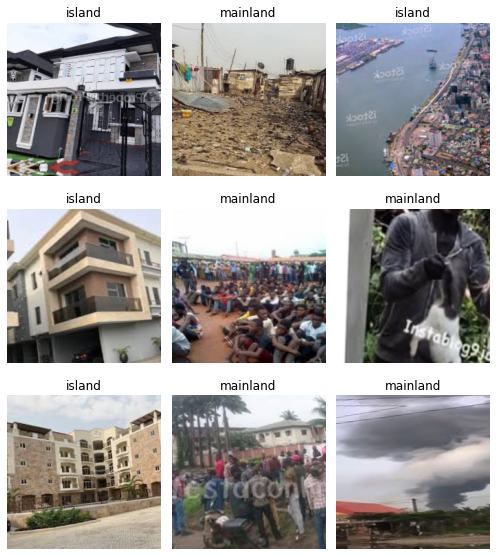

In [16]:
data.show_batch(rows=3, figsize=(7,8))

In [17]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['island', 'mainland'], 2, 392, 98)

In [18]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth


In [19]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.033046,1.344884,0.387755,02:15
1,0.869371,0.765709,0.204082,02:18
2,0.749499,0.660985,0.265306,02:16
3,0.627242,0.674278,0.275510,02:15


In [0]:
learn.save('stage-1')

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

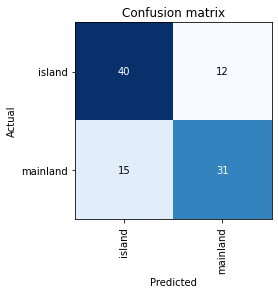

In [22]:
interp.plot_confusion_matrix()

In [0]:
learn.unfreeze()

In [24]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


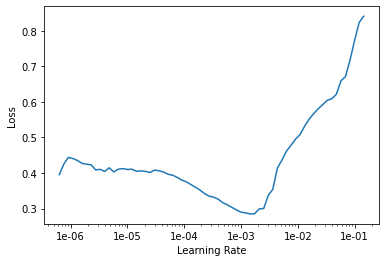

In [25]:
learn.recorder.plot()

In [26]:
learn.fit_one_cycle(3, max_lr=slice(3e-5,3e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.503983,1.031560,0.244898,03:16
1,0.459400,0.680906,0.193878,03:14
2,0.381364,0.452941,0.153061,03:14


In [0]:
learn.save('stage-2')

In [28]:
interp = ClassificationInterpretation.from_learner(learn)

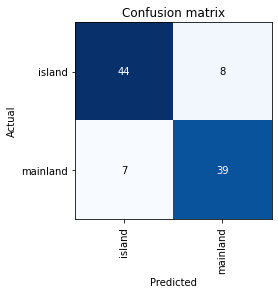

In [29]:
interp.plot_confusion_matrix()

In [0]:
learn.export()

In [31]:
path.ls()

[PosixPath('data/lagos/mainland'),
 PosixPath('data/lagos/models'),
 PosixPath('data/lagos/island'),
 PosixPath('data/lagos/export.pkl')]

In [0]:
defaults.device = torch.device('cpu')

In [90]:
from google.colab import files
urls_island = files.upload()

Saving spl5.jpg to spl5.jpg


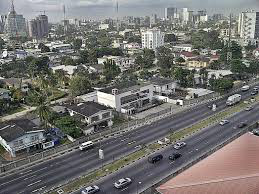

In [91]:
img = open_image('/content/spl5.jpg')
img

In [0]:
learn = load_learner(path)


In [93]:
pred_class,pred_idx,outputs = learn.predict(img)
pred_class

Category island